# Data Analysis Project: Telco-Company Customer Churn Prediction

Proyek ini bertujuan untuk mengatasi churn pelanggan di DQLab Telco, sebuah perusahaan telekomunikasi yang sedang berkembang pesat dan didirikan pada tahun 2019. Meskipun berkomitmen untuk meningkatkan pengalaman pelanggan, DQLab Telco menghadapi tantangan signifikan dengan pelanggan yang beralih ke kompetitor. Untuk mengurangi churn, manajemen memutuskan untuk memanfaatkan teknik machine learning untuk analisis prediktif.

Proyek ini terdiri dari beberapa fase kunci:
- Exploratory Data Analysis (EDA): Menganalisis data pelanggan untuk mengungkap pola, tren, dan wawasan yang mempengaruhi perilaku churn.

- Data Preprocessing: Membersihkan dan mempersiapkan dataset dari bulan Juni 2020 untuk memastikan kualitas dan keandalan sebelum pemodelan.

- Machine Learning Modelling: Mengembangkan berbagai model machine learning untuk memprediksi churn pelanggan, menggunakan algoritma yang sesuai untuk menilai efektivitasnya.

- Model Evaluation: Membandingkan kinerja model untuk mengidentifikasi model yang paling akurat dan andal dalam memprediksi churn pelanggan.

Hasil dari proyek ini akan memberikan wawasan berharga dan strategi yang dapat diambil untuk mengurangi churn pelanggan, sehingga meningkatkan retensi pelanggan dan meningkatkan kinerja bisnis secara keseluruhan.

# Import Library

In [ ]:
%pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 32.4 MB/s eta 0:00:00


In [ ]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Untuk detil datanya adalah sebagai berikut:

- `UpdatedAt` Periode of Data taken
- `customerID` Customer ID
- `gender` Whether the customer is a male or a female (Male, Female)
- `SeniorCitizen` Whether the customer is a senior citizen or not (Yes, No)
- `Partner` Whether the customer has a partner or not (Yes, No)
- `tenure` Number of months the customer has stayed with the company
- `PhoneService` Whether the customer has a phone service or not (Yes, No)
- `InternetService` Customer’s internet service provider (Yes, No)
- `StreamingTV` Whether the customer has streaming TV or not (Yes, No)
- `PaperlessBilling` Whether the customer has paperless billing or not (Yes, No)
- `MonthlyCharges` The amount charged to the customer monthly
- `TotalCharges` The total amount charged to the customer
- `Churn` Whether the customer churned or not (Yes, No)

In [ ]:
import pandas as pd
#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

#Tampilkan bentuk dari dataset
print(df_load.shape)

#Tampilkan 5 data teratas
df_load.head(5)

(6950, 13)


,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [ ]:
#Tampilkan jumlah ID yang unik
print(df_load.customerID.nunique())

churned = df_load[df_load['Churn'] == 'Yes']
print(f'{round(((churned.shape[0] / df_load.shape[0] )* 100), 2)}% churn percentage')
churned.head()

6950
26.42% churn percentage


,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
6,202006,45410681487,Male,No,Yes,39,Yes,Yes,Yes,No,80.00,3182.95,Yes
15,202006,45154150055,Male,No,No,1,Yes,No,Yes,No,62.05,62.05,Yes
18,202006,45421133154,Male,No,No,1,Yes,No,No,No,20.25,20.25,Yes
20,202006,45036252520,Male,No,No,36,Yes,No,Yes,Yes,84.90,3067.20,Yes




---


# Exploratory Data Analysis

Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya.

Dalam kasus ini, EDA akan dilakukan untuk melihat persebaran dari:
- Persentase persebaran data Churn dan tidaknya dari seluruh data
- Persebarang data dari variable predictor terhadap label (Churn)

## Persentase Churn Customers

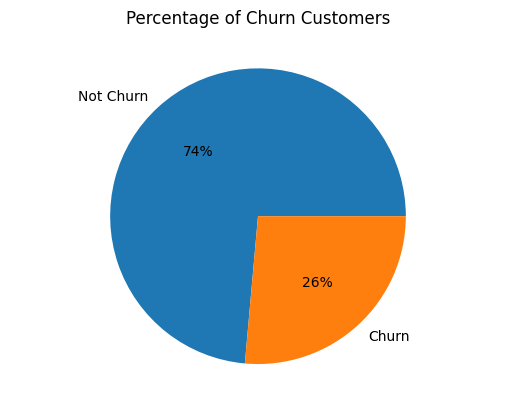

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis('equal')

labels = ['Not Churn', 'Churn']
churn = df_load.Churn.value_counts()[['No', 'Yes']]

ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title('Percentage of Churn Customers')
plt.show()

## EDA Numerical Variable
Berikutnya adalah memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat: `tenure`, `MonthlyCharges`, `TotalCharges`

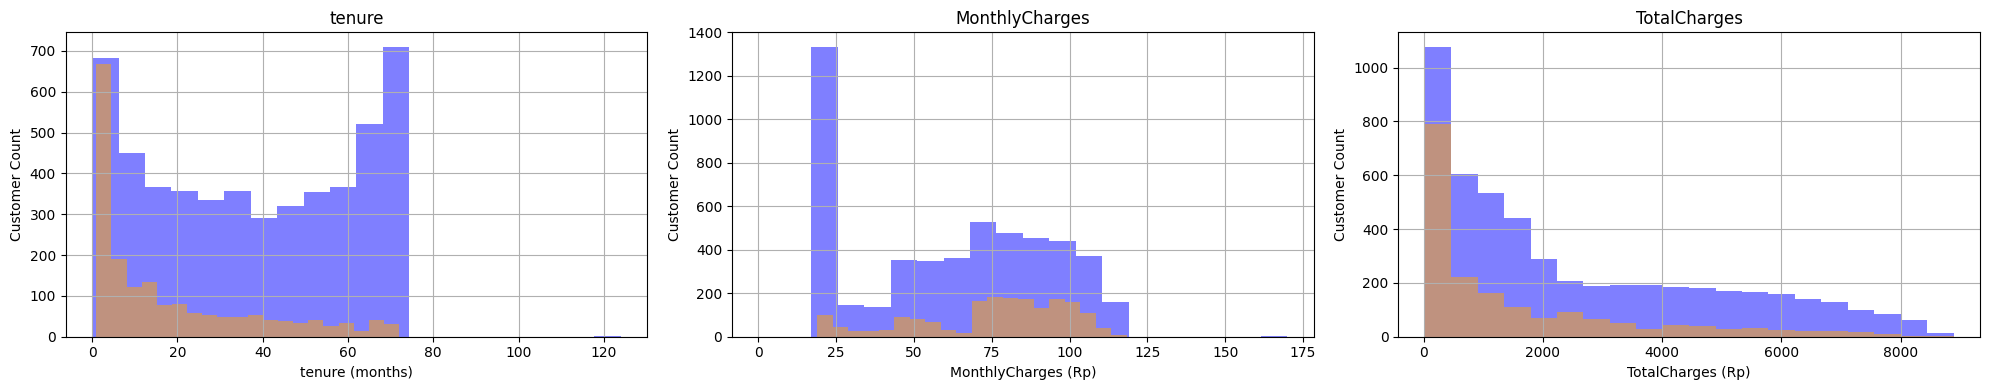

In [ ]:
# creating bin in chart
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=axs)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=axs)

axs[0].set_xlabel(f'{numerical_features[0]} (months)')
axs[1].set_xlabel(f'{numerical_features[1]} (Rp)')
axs[2].set_xlabel(f'{numerical_features[2]} (Rp)')

for i, ax in enumerate(axs):
  ax.set_ylabel('Customer Count')

plt.tight_layout()
plt.show()

## EDA Categorical Variable

Berikutnya dilakukan pemilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat, kemudian menginterpretasikannya untuk melakukan pengamatan di setiap bin kategorik variable.

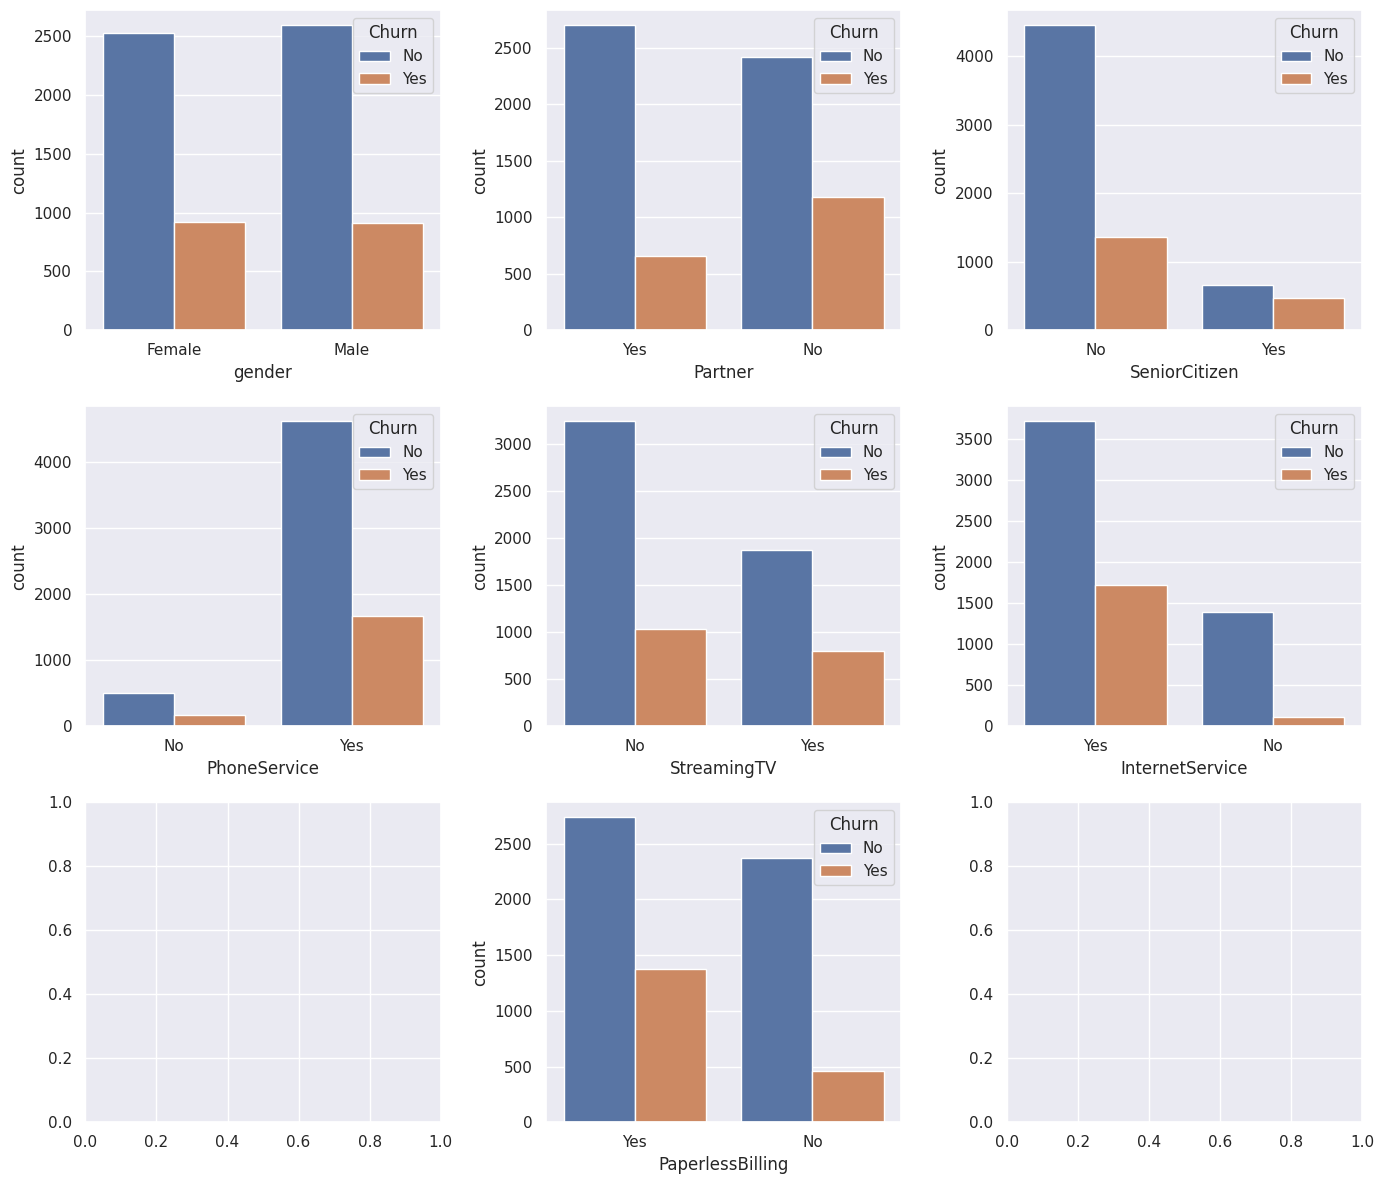

In [ ]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0,0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0,1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0,2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1,0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1,1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1,2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2,1])
plt.tight_layout()
plt.show()

## EDA Insights
Berdasarkan hasil dan analisa di atas dapat disimpulkan:

1. pada `tahap 1` dapat kita ketahui bahwa sebaran data secara kesuluruhan customer tidak melakukan churn, dengan detil `Churn` sebanyak **26%** dan `No Churn` sebanyak **74%**.

2. pada `tahap 2` dapat kita ketahui bahwa untuk `MonthlyCharges` **ada kecenderungan** semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan `Churn`. Untuk `TotalCharges` terlihat **tidak ada kecenderungan** apapun terhadap Churn customers. Untuk `tenure` **ada kecenderungan** semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn.

3. pada `tahap 3` dapat kita ketahui bahwa **tidak ada perbedaan yang signifikan untuk orang melakukan churn** dilihat dari faktor jenis kelamin `(gender)` dan layanan telfonnya `(PhoneService)`. Akan tetapi **ada kecenderungan bahwa orang yang melakukan churn adalah** orang-orang yang tidak memiliki partner `(partner: No)`, orang-orang yang statusnya adalah senior citizen`(SeniorCitizen: Yes)`, orang-orang yang mempunyai layanan streaming TV `(StreamingTV: Yes)`, orang-orang yang mempunyai layanan Internet `(internetService: Yes)` dan orang-orang yang tagihannya paperless `(PaperlessBilling: Yes)`.





---

# Data Preprocessing


## Remove Unnecessary Columns

In [ ]:
#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df_load.drop(['customerID', 'UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


## Encoding Data

In [ ]:
print(cleaned_df.describe())


            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


In [ ]:
# Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
  if np.issubdtype(cleaned_df[column].dtype, np.number):
    continue
  # Perform encoding for each non-numeric column
  cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

display(cleaned_df.describe())

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,32.423165,0.903741,0.384317,0.783453,0.591942,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,24.581073,0.294967,0.486468,0.411921,0.491509,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,124.000000,1.000000,1.000000,1.000000,1.000000,169.931250,8889.131250,1.000000


## Splitting Dataset

In [ ]:
# Predictor dan target
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))

print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
Churn
0    0.734841
1    0.265159
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
Churn
0    0.738129
1    0.261871
Name: proportion, dtype: float64


___
# Modelling: Logistic Regression

## Model Fit

In [ ]:
# Train the model
lr_model = LogisticRegression(max_iter=1000).fit(x_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: \n')
lr_model

Model Logistic Regression yang terbentuk adalah: 



LogisticRegression(max_iter=1000)

## Metrics Evaluation

In [ ]:
# Training Predict
y_train_pred = lr_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.72      4865
weighted avg       0.78      0.80      0.79      4865



In [ ]:
# Testing Predict
y_test_pred = lr_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



## Confusion Matrix Plot

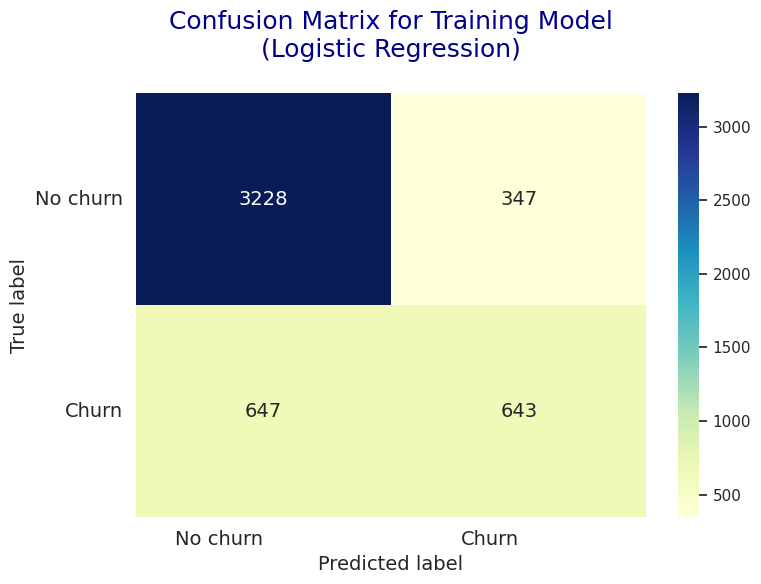

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

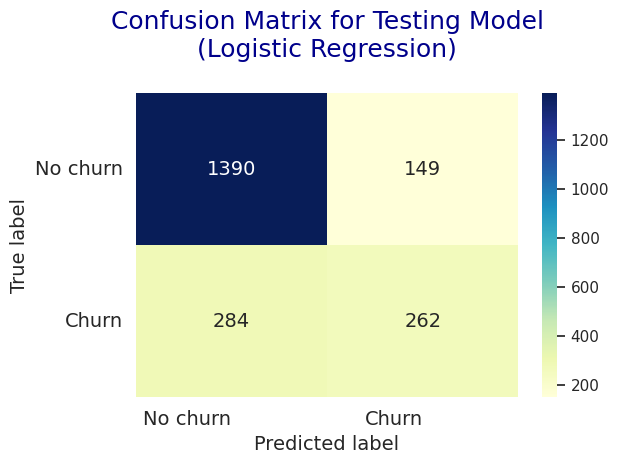

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_testing_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_testing_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

___
# Modelling: Random Forest Classifier

## Model Fit

In [ ]:
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
rdf_model

RandomForestClassifier()

## Metrics Evaluation

In [ ]:
# Training Predict
y_train_pred = rdf_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



In [ ]:
# Testing Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1539
           1       0.58      0.48      0.53       546

    accuracy                           0.77      2085
   macro avg       0.70      0.68      0.69      2085
weighted avg       0.76      0.77      0.77      2085



## Confusion Metrics Plot

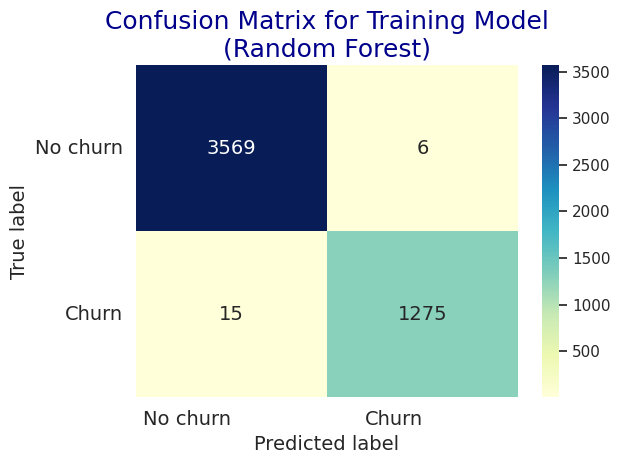

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

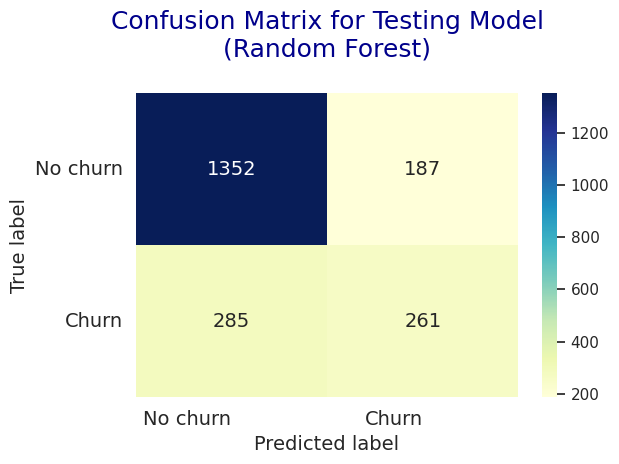

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_testing_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_testing_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

___
# Modelling: Gradient Boosting Classifier

## Model Fit

In [ ]:
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
gbt_model

GradientBoostingClassifier()

## Metrics Evaluation

In [ ]:
# Training Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Gradient Boosting Classifier) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting Classifier) :
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



In [ ]:
# Testing Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Gradient Boosting Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting Classifier):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



## Confusion Metrics Plot

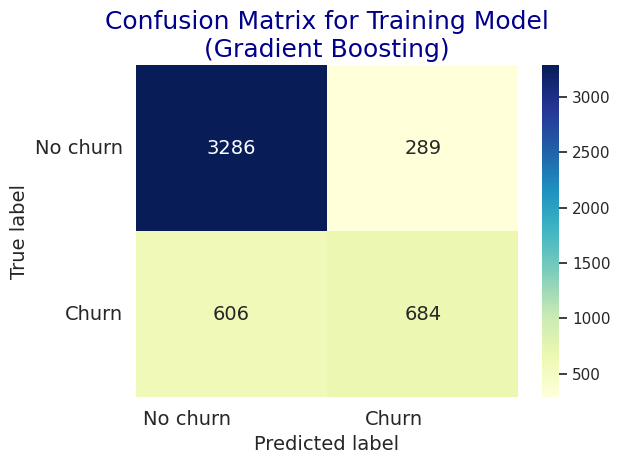

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

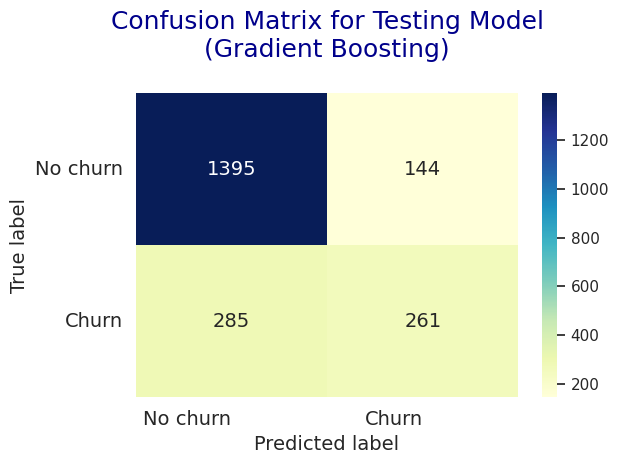

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_testing_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_testing_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
models = {
  'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
  'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
  'Gradient Boosting': GradientBoostingClassifier(random_state=42),
  'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
  'LGBM': LGBMClassifier(random_state=42)
}


Training Logistic Regression...

Classification Report for Training Data (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.72      4865
weighted avg       0.78      0.80      0.79      4865


Classification Report for Testing Data (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



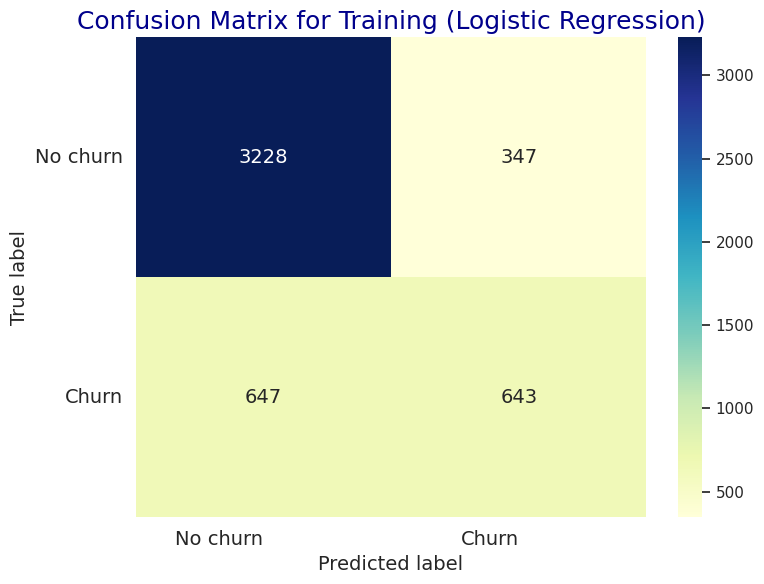

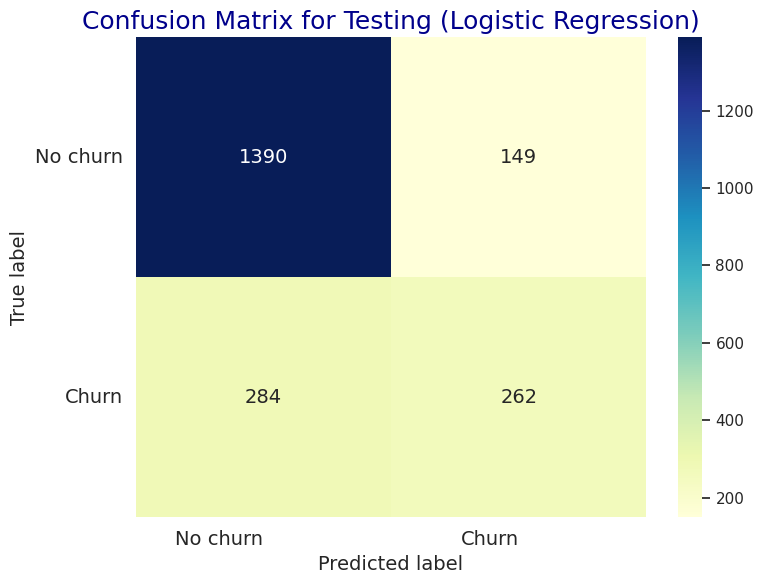


Training Random Forest...

Classification Report for Training Data (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865


Classification Report for Testing Data (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1539
           1       0.58      0.48      0.52       546

    accuracy                           0.77      2085
   macro avg       0.70      0.68      0.69      2085
weighted avg       0.76      0.77      0.77      2085



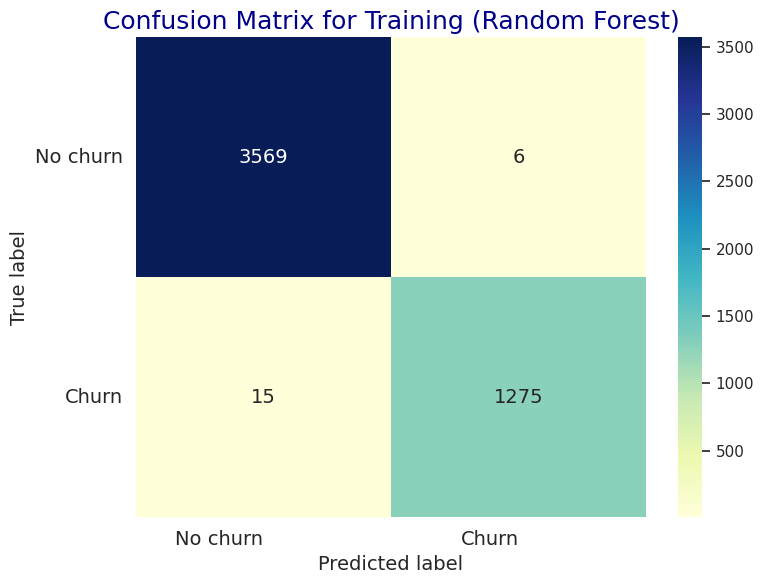

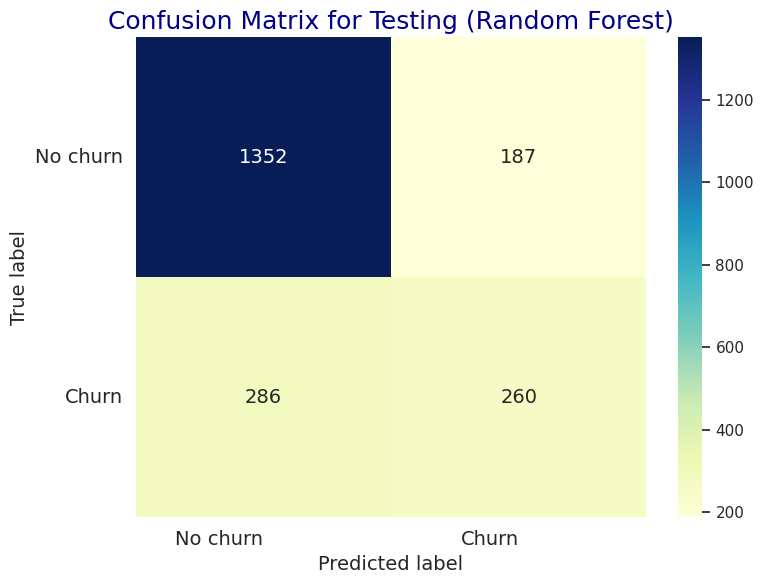


Training Gradient Boosting...

Classification Report for Training Data (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865


Classification Report for Testing Data (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



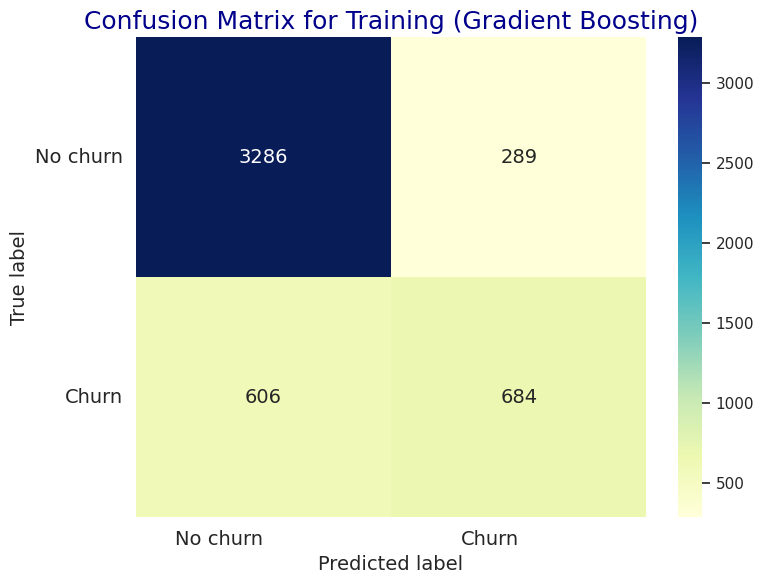

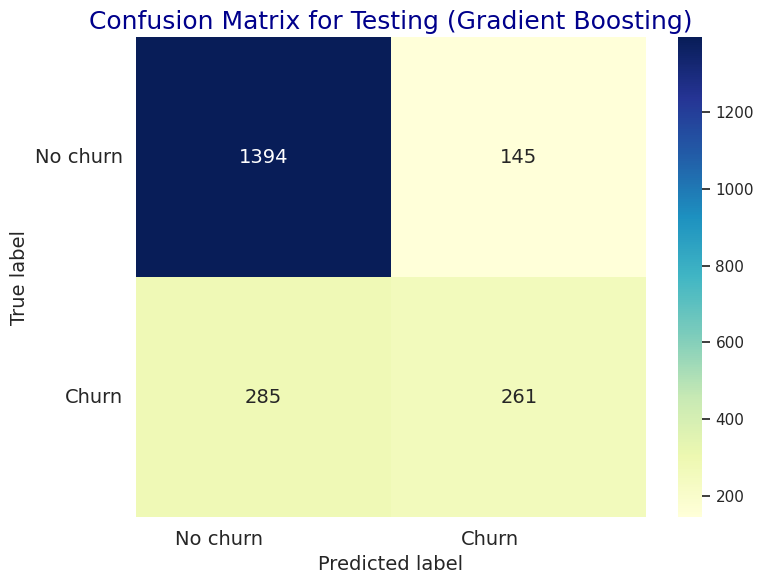


Training XGBoost...

Classification Report for Training Data (XGBoost):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3575
           1       0.88      0.76      0.82      1290

    accuracy                           0.91      4865
   macro avg       0.90      0.86      0.88      4865
weighted avg       0.91      0.91      0.91      4865


Classification Report for Testing Data (XGBoost):
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1539
           1       0.60      0.49      0.54       546

    accuracy                           0.78      2085
   macro avg       0.71      0.69      0.70      2085
weighted avg       0.77      0.78      0.77      2085



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:03:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


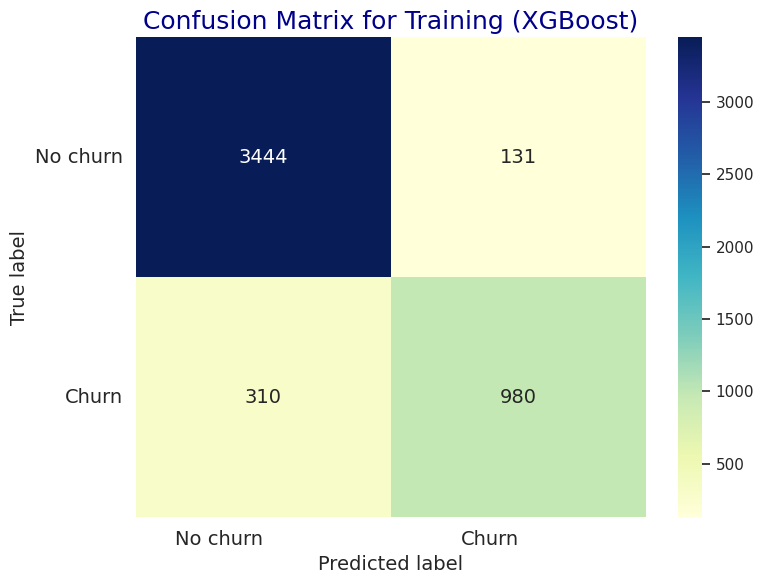

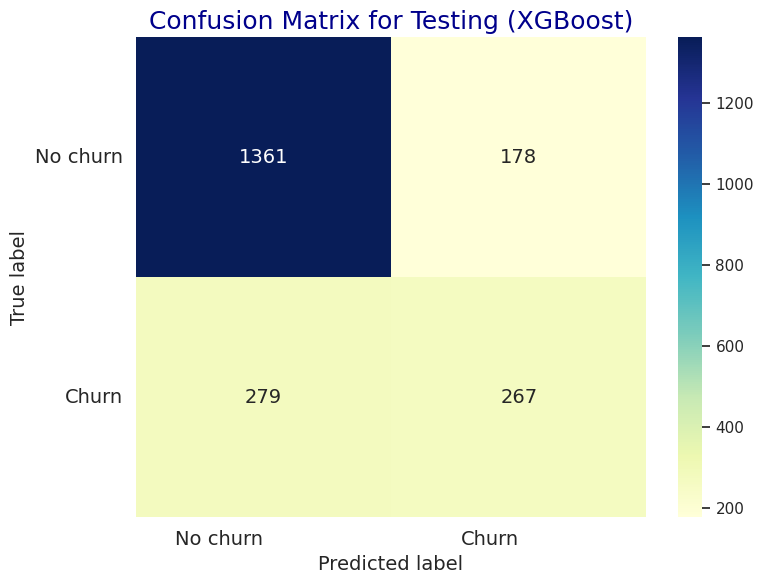


Training LGBM...
[LightGBM] [Info] Number of positive: 1290, number of negative: 3575
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 4865, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265159 -> initscore=-1.019323
[LightGBM] [Info] Start training from score -1.019323

Classification Report for Training Data (LGBM):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3575
           1       0.80      0.65      0.71      1290

    accuracy                           0.86      4865
   macro avg       0.84      0.79      0.81      4865
weighted avg       0.86      0.86      0.86      4865


Classification Report for Testing Data (LGBM):
    

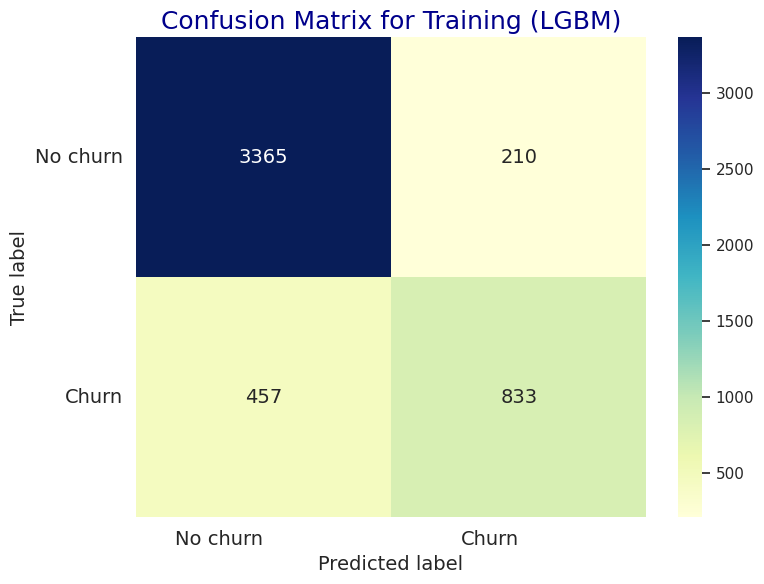

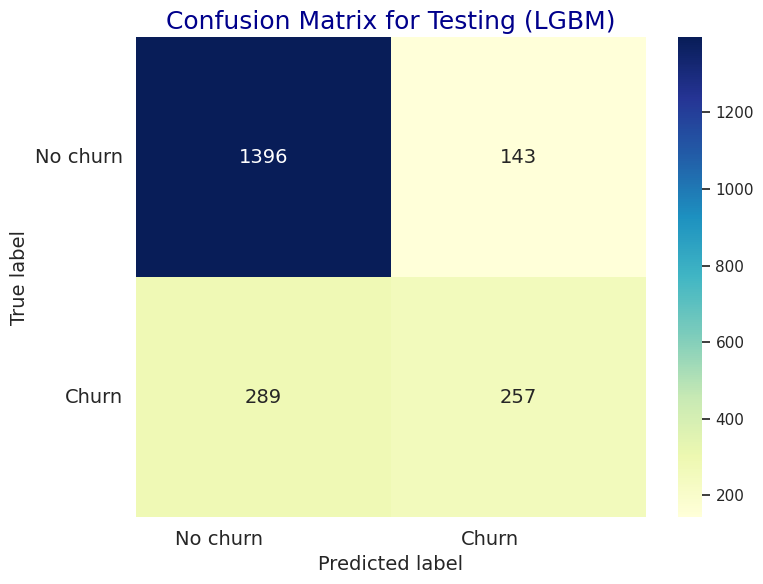

In [ ]:
# Function to train, evaluate, and plot results for each model
def train_and_evaluate(models):
  for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(x_train, y_train)

    # Training metrics
    y_train_pred = model.predict(x_train)
    print(f'\nClassification Report for Training Data ({model_name}):')
    print(classification_report(y_train, y_train_pred))

    # Testing metrics
    y_test_pred = model.predict(x_test)
    print(f'\nClassification Report for Testing Data ({model_name}):')
    print(classification_report(y_test, y_test_pred))

    # Plot Confusion Matrix for Training
    plot_confusion_matrix(y_train, y_train_pred, title=f'Confusion Matrix for Training ({model_name})')

    # Plot Confusion Matrix for Testing
    plot_confusion_matrix(y_test, y_test_pred, title=f'Confusion Matrix for Testing ({model_name})')

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
  confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, y_pred), index=['No churn', 'Churn'], columns=['No churn', 'Churn'])
  plt.figure(figsize=(8, 6))
  heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

  plt.title(title, fontsize=18, color='darkblue')
  plt.ylabel('True label', fontsize=14)
  plt.xlabel('Predicted label', fontsize=14)
  plt.tight_layout()
  plt.show()

# Call the function to train and evaluate all models
train_and_evaluate(models)

___
# Choose Best Algorithm

[LightGBM] [Info] Number of positive: 1290, number of negative: 3575
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 4865, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265159 -> initscore=-1.019323
[LightGBM] [Info] Start training from score -1.019323


/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


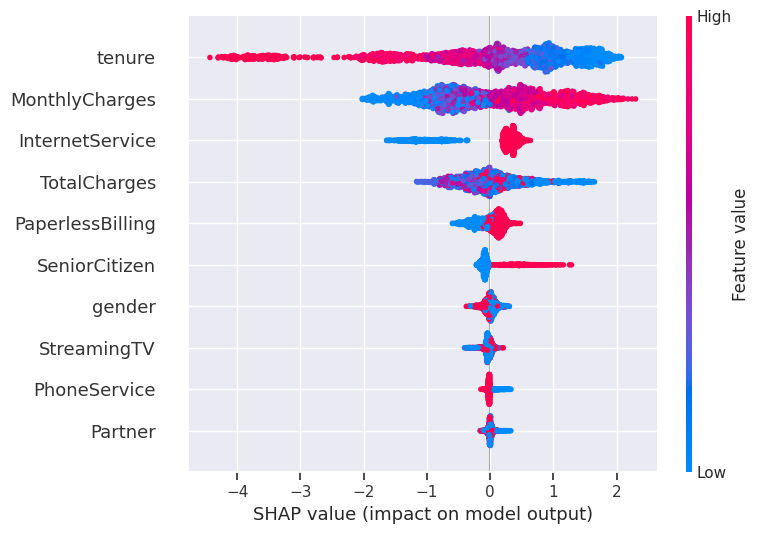

In [ ]:
import shap
# Load model LightGBM dari dictionary models
lgbm_model = models['LGBM']

# Train the LightGBM model (if not already trained)
lgbm_model.fit(x_train, y_train)

# Initialize SHAP explainer for LightGBM model
explainer = shap.TreeExplainer(lgbm_model)

# Calculate SHAP values
shap_values = explainer.shap_values(x_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, x_test)

## Interpretasi Fitur:

- tenure: Pelanggan dengan waktu berlangganan yang singkat (ditunjukkan dengan warna biru) lebih cenderung churn, sedangkan pelanggan dengan waktu berlangganan yang lama (merah) cenderung tetap bertahan.
- MonthlyCharges: Pelanggan dengan biaya bulanan tinggi (merah) cenderung churn, sementara pelanggan dengan biaya rendah (biru) cenderung bertahan.
- InternetService: Memiliki internet service juga mempengaruhi churn, terutama pelanggan yang memiliki layanan dengan kualitas rendah atau tidak puas (lebih cenderung churn).
- TotalCharges: Pelanggan dengan total biaya yang lebih tinggi cenderung tidak churn (merah di sebelah kanan), tetapi ada sedikit interaksi dengan fitur lain yang menyebabkan beberapa churn.
- PaperlessBilling: Pelanggan dengan PaperlessBilling lebih cenderung churn, mungkin karena preferensi terhadap pengalaman digital tidak sesuai dengan ekspektasi.
- SeniorCitizen: Pelanggan senior (biru) memiliki kecenderungan churn yang lebih tinggi, sementara yang bukan senior (merah) lebih cenderung bertahan.
- StreamingTV, PhoneService, Partner dan gender memiliki dampak yang lebih kecil dibanding fitur lainnya.

# Kesimpulan

Berdasarkan pemodelan yang telah dilakukan dengan menggunakan Logistic Regression, Random Forest dan Extreme Gradiant Boost, maka dapat disimpulkan untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima Logistic Regression. Hal ini dikarenakan performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 80%, akurasi testing 79%), dilain sisi algoritma lainnya cenderung Over-Fitting performanya. Akan tetapi hal ini tidak menjadikan kita untuk menarik kesimpulan bahwsannya jika untuk melakukan pemodelan apapun maka digunakan Logistic Regression, kita tetap harus melakukan banyak percobaan model untuk menentukan mana yang terbaik.

# Rekomendasi Bisnis untuk Mengatasi Permasalahan Churn:

- Fokus pada Retensi Pelanggan Baru (Tenure Rendah):
Pelanggan dengan tenure rendah (baru berlangganan) cenderung lebih tinggi untuk churn. Program onboarding yang lebih baik, penawaran paket khusus, dan interaksi pelanggan di awal masa langganan bisa membantu meningkatkan retensi.

- Penawaran Khusus untuk Pelanggan dengan Biaya Bulanan Tinggi:
Berikan insentif atau diskon kepada pelanggan dengan biaya bulanan tinggi. Mereka cenderung churn, sehingga diskon, upgrade paket, atau program loyalitas bisa meningkatkan kepuasan mereka.

- Tingkatkan Kualitas Layanan Internet:
Karena InternetService berperan dalam churn, analisis lebih lanjut diperlukan untuk menentukan apakah kualitas layanan, kecepatan internet, atau harga paket mempengaruhi churn. Menyediakan layanan yang lebih handal atau paket yang lebih fleksibel mungkin bisa mengurangi churn.

- Ubah Kebijakan Paperless Billing:
Menawarkan opsi untuk kembali ke metode pembayaran tradisional bagi pelanggan yang merasa tidak nyaman dengan penagihan tanpa kertas dapat membantu mengurangi churn, terutama untuk pelanggan yang kurang teknis.

- Perhatikan Segmen Pelanggan Senior:
Pelanggan senior menunjukkan kecenderungan churn yang lebih tinggi. Kampanye yang lebih personal, layanan pelanggan yang responsif, atau paket yang sesuai untuk kebutuhan pelanggan senior dapat membantu meningkatkan loyalitas mereka.

- Intervensi Dini untuk Pelanggan dengan Riwayat Pembayaran yang Berfluktuasi:
Pelanggan dengan TotalCharges yang lebih rendah atau berfluktuasi menunjukkan risiko churn yang lebih besar. Analisis lebih dalam terhadap pola pembayaran mereka, dan program dukungan seperti fleksibilitas pembayaran atau program loyalitas untuk mengurangi churn.

- Pengujian A/B dan Kampanye Terfokus:
Uji beberapa strategi retensi, seperti diskon, peningkatan layanan, atau penawaran khusus melalui kampanye yang ditargetkan kepada pelanggan dengan risiko churn yang lebih tinggi. Gunakan hasil untuk mengukur efektivitas setiap strategi.